# Исследование сервиса аренды самокатов GoFast

**ТЗ**
 
Даны данные с сервиса аренды самокатов GoFast из нескольких городов.
Необходимо проанализировать данные и проверьте некоторые гипотезы для будущих акций, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

    без подписки
        абонентская плата отсутствует;
        стоимость одной минуты поездки — 8 рублей;
        стоимость старта (начала поездки) — 50 рублей;
        
    с подпиской Ultra
        абонентская плата — 199199 рублей в месяц;
        стоимость одной минуты поездки — 66 рублей;
        стоимость старта — бесплатно.
 
 **Основная цель**\
Проанализировать данные, проверить гипотезы.

_Гипотезы:_

- Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки

- Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и 

- Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

- Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.

- Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

- Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.


 **План**
 
1. Открыть и изучить данные, выполнить предобработку если она необходима (пропущенные значения, аномалии, неинформационные признаки). 
2. Выполнить исследовательский анализ
3. Сделать выводы об имеющихся признаках
4. Объединение данных
5. Создать дополнительно два датафрейма c данными о пользователях без подписки и с подпиской
6. Подсчитать выручку с агрегированными данными о поездках 
7. Проверить гипотезы, написать вывод
8. Общий вывод по проекту: расчеты , общие рекомендации


## Data preparation

**1.1 import library**

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
print(mpl.__version__)

3.7.0


**1.2 Open data**

In [3]:

path_loc = 'D:/other_work/Yandex_practicum/PROJECT/project_4_GoFast_scooters/'

try:
    data_users = pd.read_csv(path_loc + 'users_go.csv', sep=',')
    data_rides = pd.read_csv(path_loc + 'rides_go.csv', sep=',')
    data_subscriptions = pd.read_csv(path_loc + 'subscriptions_go.csv', sep=',')
except:
    data_users = pd.read_csv('/datasets/users_go.csv', sep=',')
    data_rides = pd.read_csv('/datasets/rides_go.csv', sep=',')
    data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')
    
   

**1.3 Set working area**

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## EDA and read data

In [5]:
# созданы копии таблиц (возможно понадобятся для анализа)
data_users_copy = data_users.copy(deep=True)            
data_rides_copy = data_rides.copy(deep=True)                    
data_subscriptions_copy = data_subscriptions.copy(deep=True) 

Посмотрим данные по каждой из таблиц

    Пользователи — users_go.csv
    Поездки — rides_go.csv
    Подписки — subscriptions_go.csv

In [6]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Описание данных:
* user_id - уникальный идентификатор пользователя
* name - имя пользователя
* age - возраст
* city - город
* subscription_type - тип подписки (free, ultra)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 412.6 KB
None
          count        mean         std   min    25%    50%     75%     max
user_id  1565.0  762.633866  443.260155   1.0  378.0  762.0  1146.0  1534.0
age      1565.0   24.922045    4.553496  12.0   22.0   25.0    28.0    43.0


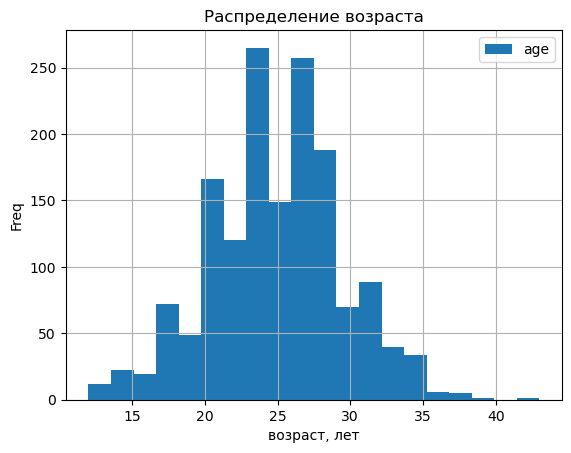

In [7]:
print(data_users.info(memory_usage='deep'))
print(data_users.describe().T)
data_users.plot(kind='hist', y='age', bins=20, grid=True)
plt.xlabel('возраст, лет')
plt.ylabel('Freq')
plt.title('Распределение возраста')
plt.show()

Распределение по городам

In [8]:
data_users.groupby('city').agg({'city':'count'}).assign(percent_of_user=lambda x: x / x.sum() * 100 ).\
style.highlight_max(color='green', subset=['city','percent_of_user']).highlight_min(color='yellow', subset=['city','percent_of_user']).format({'percent_of_user': '{:.2f}%'})

,city,percent_of_user
city,,
Екатеринбург,206,13.16%
Краснодар,196,12.52%
Москва,172,10.99%
Омск,186,11.88%
Пятигорск,226,14.44%
Ростов-на-Дону,202,12.91%
Сочи,192,12.27%
Тюмень,185,11.82%


Подписки

In [9]:
data_users.groupby('subscription_type').agg({'subscription_type':'count'}).assign(percent_of_tariff=lambda x: x / x.sum() * 100 ).\
style.highlight_max(color='green', subset=['subscription_type','percent_of_tariff']).highlight_min(color='yellow', subset=['subscription_type','percent_of_tariff']).\
format({'percent_of_tariff': '{:.2f}%'})

,subscription_type,percent_of_tariff
subscription_type,,
free,846,54.06%
ultra,719,45.94%


In [10]:
data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Описание данных:
* user_id - уникальный идентификатор пользователя
* distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
* duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* date - дата совершения поездки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6 MB
None
            count         mean          std       min          25%  \
user_id   18068.0   842.869936   434.734317  1.000000   487.000000   
distance  18068.0  3070.659976  1116.831209  0.855683  2543.226360   
duration  18068.0    17.805011     6.091051  0.500000    13.597563   

                  50%          75%          max  
user_id    889.000000  1213.250000  1534.000000  
distance  3133.609994  3776.222735  7211.007745  
duration    17.678395    21.724800    40.823963  


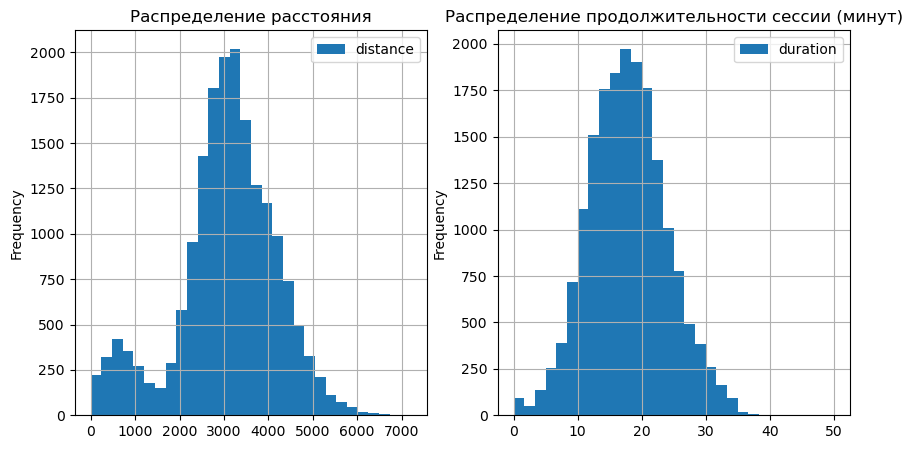

In [11]:
print(data_rides.info(memory_usage='deep'))
print(data_rides.describe().T)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
data_rides.plot(kind='hist', y='distance', bins=30, grid=True, title='Распределение расстояния', ax=axes[0])
data_rides.plot(kind='hist', y='duration', bins=30, range=(0,50), grid=True, title='Распределение продолжительности сессии (минут)', ax=axes[1])
plt.show()

In [12]:
print('какие id пользователей больше всего пользуются сервисом :')
data_rides.pivot_table(index='user_id', aggfunc='count')['date'].sort_values(ascending=False).head(5)

какие id пользователей больше всего пользуются сервисом :


user_id
1236    27
783     26
1063    26
1204    24
1149    23
Name: date, dtype: int64

In [13]:
data_users.loc[data_users['user_id'] == 1236]

,user_id,name,age,city,subscription_type
1235,1236,Александр,31,Екатеринбург,free


In [14]:
print('данные предоставлены за период :')
print(data_rides['date'].min(), data_rides['date'].max())

данные предоставлены за период :
2021-01-01 2021-12-30


In [15]:
data_subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Описание данных:
* subscription_type - тип подписки
* minute_price - стоимость одной минуты поездки по данной подписке
* start_ride_price - стоимость начала поездки
* subscription_fee - стоимость ежемесячного платежа

In [16]:
print(data_subscriptions.info(memory_usage='deep'))
print(data_subscriptions.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 299.0 bytes
None
                  count  mean         std  min    25%   50%     75%    max
minute_price        2.0   7.0    1.414214  6.0   6.50   7.0    7.50    8.0
start_ride_price    2.0  25.0   35.355339  0.0  12.50  25.0   37.50   50.0
subscription_fee    2.0  99.5  140.714249  0.0  49.75  99.5  149.25  199.0


**Промежуточный вывод:**

Больше всего пользуются сервисом в Пятигорске, но разница не особо большая с Москвой. К тому же люди в городах предпочитают чуть больше бесплатный тариф (free = 54.06 %)
Видно что в основном это возраст от 20-28 лет, а продолжительность поездки(сессии) примерно варьируется 14-26 мин

Александр 31 год из Екатеринбурга наиболее активный в нашей выборке.

Данные предоставлены за 1 год с 1 янаваря 2021 года по 30 декабря 2021 года.

Радует то что нет отрицательных значений, а в колонке город нет опечаток

**Анализ таблиц на значение NaN (пропуски) и значения 0**

In [17]:
def empty_na(df):
    df_data = []
    column = df.columns
    #colours = ['#000099', '#ffff00'] 
    for col in df.columns:
        column_na_values = df[col].isna().sum()
        column_zero_values = df[col][df[col] == 0].count()
        column_na_rate = column_na_values / df.shape[0]
        column_na_zero_rate = (column_na_values + column_zero_values) / df.shape[0]
        df_data.append([col, column_na_values, column_zero_values, column_na_rate, column_na_zero_rate])
    
    df_res = pd.DataFrame(data=df_data, columns=['Имя столбца', 'Кол-во NaN', 'Кол-во значений 0', 'Процент значений NaN', 'Процент значений 0+NaN'])
    print('всего строк = ', df.shape[0])
    sns.heatmap(df[column].isnull())
    return df_res




Проверим таблицу data_users и построим тепловую карту , которая демонстрирует паттерн пропущенных значений
всего строк =  1565


,Имя столбца,Кол-во NaN,Кол-во значений 0,Процент значений NaN,Процент значений 0+NaN
0,user_id,0,0,0.0,0.0
1,name,0,0,0.0,0.0
2,age,0,0,0.0,0.0
3,city,0,0,0.0,0.0
4,subscription_type,0,0,0.0,0.0


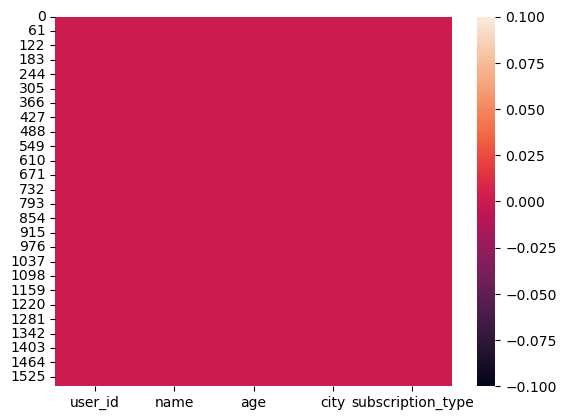

In [18]:
print('Проверим таблицу data_users и построим тепловую карту , которая демонстрирует паттерн пропущенных значений')
empty_na(data_users)

Проверим таблицу data_rides и построим тепловую карту , которая демонстрирует паттерн пропущенных значений
всего строк =  18068


,Имя столбца,Кол-во NaN,Кол-во значений 0,Процент значений NaN,Процент значений 0+NaN
0,user_id,0,0,0.0,0.0
1,distance,0,0,0.0,0.0
2,duration,0,0,0.0,0.0
3,date,0,0,0.0,0.0


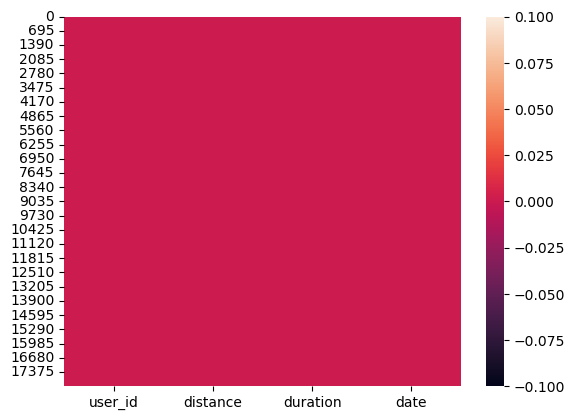

In [19]:
print('Проверим таблицу data_rides и построим тепловую карту , которая демонстрирует паттерн пропущенных значений')
empty_na(data_rides)

Проверим таблицу data_subscriptions и построим тепловую карту , которая демонстрирует паттерн пропущенных значений
всего строк =  2


,Имя столбца,Кол-во NaN,Кол-во значений 0,Процент значений NaN,Процент значений 0+NaN
0,subscription_type,0,0,0.0,0.0
1,minute_price,0,0,0.0,0.0
2,start_ride_price,0,1,0.0,0.5
3,subscription_fee,0,1,0.0,0.5


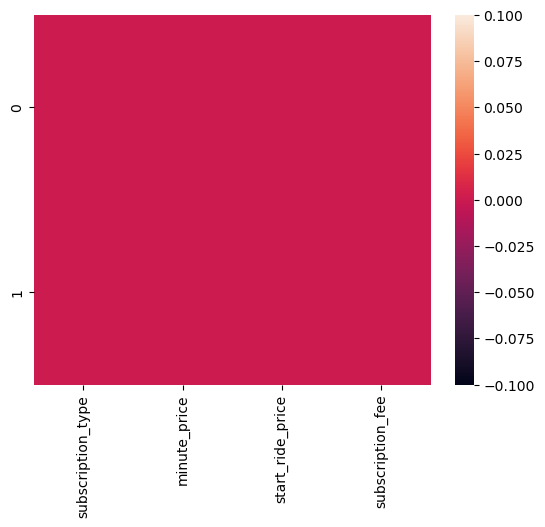

In [20]:
print('Проверим таблицу data_subscriptions и построим тепловую карту , которая демонстрирует паттерн пропущенных значений')
empty_na(data_subscriptions)

Отлично!  пропущенных значений в 3х таблицах нет, а вот значения 0 в data_subscriptions есть, ну это и логично исходя из описания проекта.

**Изменение типа данных в таблицах**

In [21]:
def type_column(df):
    for col in sorted(df.columns):
        print(col, ': ', df[col].dtypes)

In [22]:
type_column(data_users)

age :  int64
city :  object
name :  object
subscription_type :  object
user_id :  int64


In [23]:
type_column(data_rides)

date :  object
distance :  float64
duration :  float64
user_id :  int64


In [24]:
type_column(data_subscriptions)

minute_price :  int64
start_ride_price :  int64
subscription_fee :  int64
subscription_type :  object


Из описания таблиц видно что у нас не совпадает только date = object. Здесь лучше назначить тип данных как datetime поэтому:

- Приведем столбец date к типу даты pandas.
- Создадим новый столбец с номером месяца на основе столбца date.


In [25]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')
data_rides['month'] = data_rides["date"].dt.month
type_column(data_rides)
data_rides.head()

date :  datetime64[ns]
distance :  float64
duration :  float64
month :  int64
user_id :  int64


,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**Обработка дубликатов в таблицах**

Проверим в 3х таблицах дубликаты методом duplicated, если такие имеются обработаем их

In [26]:
print('кол-во дублирующих строк в таблице data_users = ', data_users.duplicated().sum())
print('кол-во дублирующих строк в таблице data_rides = ', data_rides.duplicated().sum())
print('кол-во дублирующих строк в таблице data_subscriptions = ', data_subscriptions.duplicated().sum())

кол-во дублирующих строк в таблице data_users =  31
кол-во дублирующих строк в таблице data_rides =  0
кол-во дублирующих строк в таблице data_subscriptions =  0


In [27]:
print(data_users.shape[0])
data_users = data_users.drop_duplicates() 
print('кол-во дублирующих строк в таблице data_users = ', data_users.duplicated().sum())
print(data_users.shape[0])

1565
кол-во дублирующих строк в таблице data_users =  0
1534


**Анализ выбивающихся значений**

Что касается аномальных и выбивающихся значений:
- табл data_subscriptions оставляем в покое
- табл data_users: хоть и минимальный возраст мы видели = 12 годам, а ездить на электросамокате разрешается людям, достигшим 18 лет, но молодежь имеет телефон и арендует их в разном возрасте и проблем не возникает. Как устроена система проверки возраста для Яндекс Го мне не известно. Поэтому оставляем как есть.
- табл data_rides. Электросамокат на одном заряде может проехать до 3х км, а растоние меньше метра возможно говорит: либо пользователь передумал, либо что-то случилось с самокатом (аккумулятор), либо не хватило денег у пользователя для полноценной поездки. Предварительно оставляем так. Возможно дальше для анализа нам понадобиться какая-нибудь корректировка здесь. Но давайте посмотрим сколько таких поздок < 5 м и сколько поездок < 1 минуты. 

In [28]:
print(data_rides.query('distance < 10').shape[0])
print(data_rides.query('duration < 1').shape[0])

5
95


**Промежуточный вывод:**

Предобработка таблиц показала:
- значений NaN не обнаружено
- значения 0 в data_subscriptions есть, ну это и логично исходя из описания таблицы.
- увидели только одно поле с некорректным типом данных. Поле  date исправлено, добавлен новый столбец месяц
- Удалили дубли в таблице data_users
- Выборка сделана за один год

Итого можно сказать что качество данных приемлемо. Но мы также увидели редкие значения.
Например: колонка возраст - все что меньше 15 лет и больше 40.

## Analysis

**Частота встречаемости городов**

In [29]:
data_users.groupby('city').agg({'city':'count'}).assign(percent_of_user=lambda x: x / x.sum() * 100 ).\
style.highlight_max(color='green', subset=['city','percent_of_user']).highlight_min(color='yellow', subset=['city','percent_of_user']).format({'percent_of_user': '{:.2f}%'})



,city,percent_of_user
city,,
Екатеринбург,204,13.30%
Краснодар,193,12.58%
Москва,168,10.95%
Омск,183,11.93%
Пятигорск,219,14.28%
Ростов-на-Дону,198,12.91%
Сочи,189,12.32%
Тюмень,180,11.73%


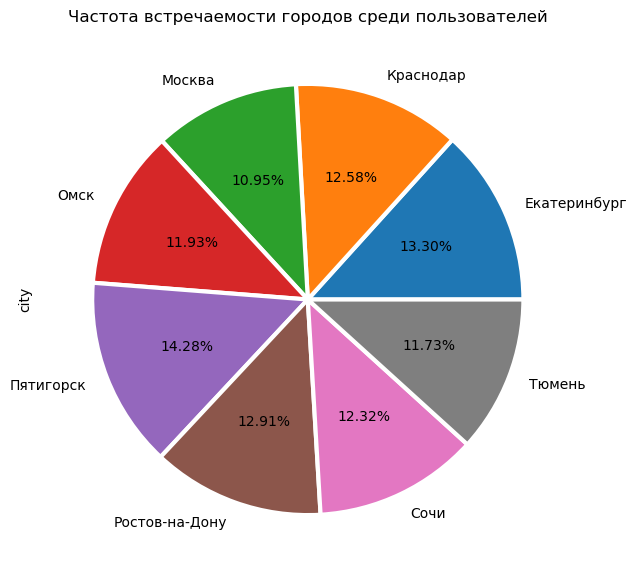

In [30]:
data_users.groupby('city').agg({'city':'count'}).assign(percent_of_user=lambda x: x / x.sum() * 100 ).\
plot(kind='pie', 
     y='city', 
     legend=False,
     autopct = '%.2f%%',
     wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white' }, 
     title = 'Частота встречаемости городов среди пользователей',
     figsize=(7,7)
    );

Как и упоминалось ранее больше всего ездят в Пятигорске, но вцелом разница между Москвой и Питером небольшая. В средней распределение равномерное между всеми городами

**Соотношение пользователей с подпиской и без подписки**

In [31]:
data_users.groupby('subscription_type').agg({'subscription_type':'count'}).assign(percent_of_tariff=lambda x: x / x.sum() * 100 ).\
style.highlight_max(color='green', subset=['subscription_type','percent_of_tariff']).highlight_min(color='yellow', subset=['subscription_type','percent_of_tariff']).format({'percent_of_tariff': '{:.2f}%'})

,subscription_type,percent_of_tariff
subscription_type,,
free,835,54.43%
ultra,699,45.57%


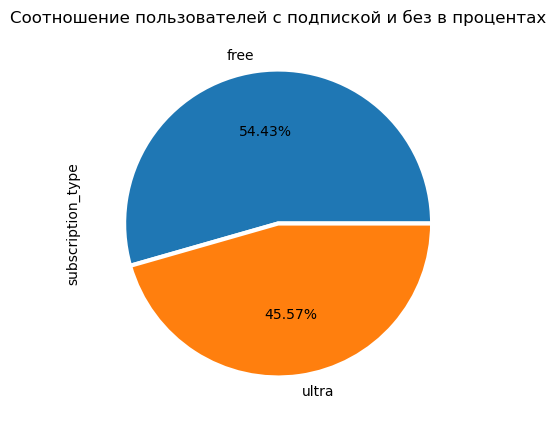

In [32]:
data_users.groupby('subscription_type').agg({'subscription_type':'count'}).assign(percent_of_tariff=lambda x: x / x.sum() * 100 ).\
plot(kind='pie', 
     y='subscription_type', 
     legend=False,
     autopct = '%.2f%%',
     wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white' }, 
     title = 'Соотношение пользователей с подпиской и без в процентах',
     figsize=(5,5)
    );

Больше преобладают пользователи без подписки

**Возраст пользователей**

In [33]:
data_users.groupby('age').agg({'age':'count'})
#data_users.pivot_table(index='age', aggfunc='count')['user_id']


,age
age,
12,4
13,8
14,9
15,13
16,19
17,26
18,46
19,47
20,71


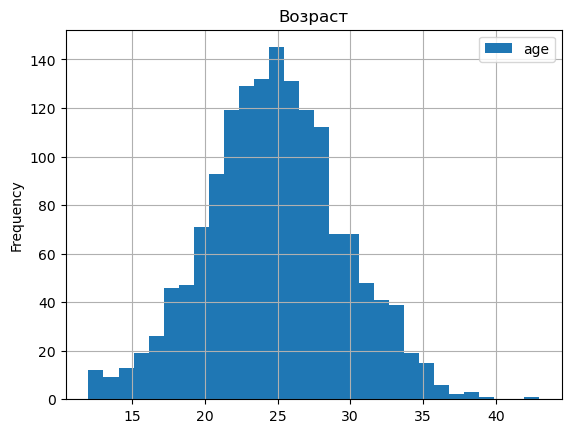

In [34]:
data_users.plot(kind='hist', y='age', bins=30, grid=True, title='Возраст');

Мы видим что минимальный возраст в нашей таблице = 12, 13 годам а максимальный = 39, 43. Но данных значений не много. 
Как и упоминалось ранее в основном пользуются люди в возрасте = 22 - 28 лет

**Расстояние, которое пользователь преодолел за одну поездку**

всего записей =  18068 
 минимальная дистанция =  0.86 
 максимальная дистанция =  7211.01 
 медиана дистанции =  3133.61 
 среднее дистанции =  3070.66

11555     0.855683
9541      2.570787
13690     4.329506
8658      6.784447
7841      7.097072
8906     11.283615
8324     12.233115
13940    15.000606
15626    15.366168
11862    15.630873
Name: distance, dtype: float64
78
16309    7211.007745
16484    7066.003772
15580    6908.491343
17171    6760.940067
17242    6724.932981
10341    6671.969833
11385    6601.197575
12086    6538.937375
10915    6535.386520
11319    6503.600402
Name: distance, dtype: float64
46


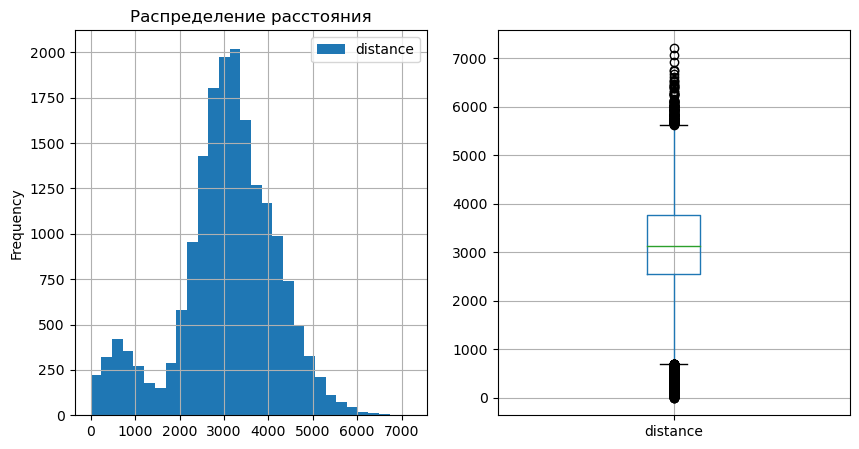

In [35]:
print('всего записей = ', data_rides.shape[0], '\n',
      'минимальная дистанция = ', np.round(data_rides['distance'].min(), 2), '\n',
      'максимальная дистанция = ', np.round(data_rides['distance'].max(), 2), '\n',
      'медиана дистанции = ', np.round(data_rides['distance'].median(), 2), '\n',
      'среднее дистанции = ', np.round(data_rides['distance'].mean(), 2)
     )
print()
print(data_rides.query('distance < 100')['distance'].sort_values(ascending=True).head(10))
print(data_rides.query('distance < 100').shape[0])

print(data_rides.query('distance > 6000')['distance'].sort_values(ascending=False).head(10))
print(data_rides.query('distance > 6000').shape[0])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
data_rides.plot(kind='hist', y='distance', bins=30, grid=True, title='Распределение расстояния', ax=axes[0])
data_rides.boxplot(column='distance', ax=axes[1])
plt.show()

<br>Самая минимальная дистанция =  0.86
<br>Самая максимальная дистанция =  7211.01  
<br>Медиана приблизительно равна среднему = 3.1 км. В основном пользователи сервиса ездят по 2.5-3.8 км. 
<br>Также мы видим :
<br>Кол-во пройденного пути < 100 м = 78 записей
<br>Кол-во пройденного пути > 6000 м = 46 записей

**Продолжительность поездок**

всего записей =  18068 
 минимальная продолжительность мин =  0.5 
 максимальная продолжительность мин =  40.82 
 медиана продолжительности =  17.68 
 среднее продолжительности =  17.81

6531     0.5
14615    0.5
14574    0.5
14417    0.5
14342    0.5
14178    0.5
13979    0.5
13976    0.5
13701    0.5
13698    0.5
Name: duration, dtype: float64
95
4215    40.823963
4709    39.873856
2623    39.526602
1998    38.352763
6453    38.265229
143     38.125729
3729    37.014141
499     36.906491
6348    36.809310
4653    36.622595
Name: duration, dtype: float64
543


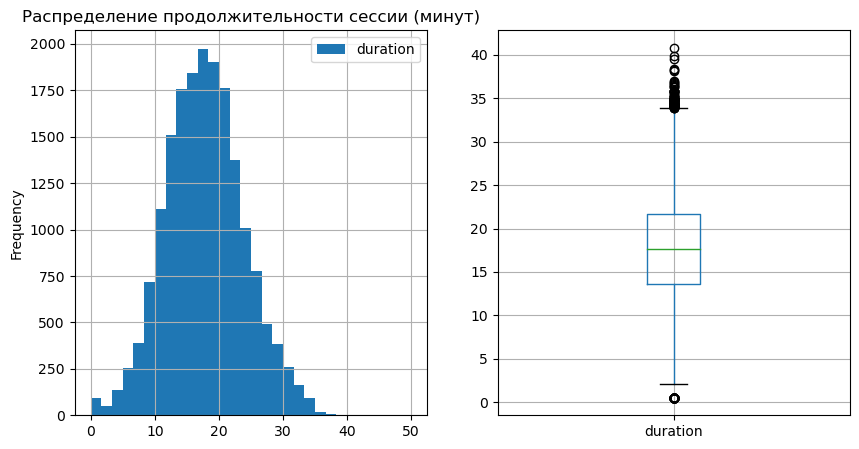

In [36]:
print('всего записей = ', data_rides.shape[0], '\n',
      'минимальная продолжительность мин = ', np.round(data_rides['duration'].min(), 2), '\n',
      'максимальная продолжительность мин = ', np.round(data_rides['duration'].max(), 2), '\n',
      'медиана продолжительности = ', np.round(data_rides['duration'].median(), 2), '\n',
      'среднее продолжительности = ', np.round(data_rides['duration'].mean(), 2)
     )
print()
print(data_rides.query('duration < 1')['duration'].sort_values(ascending=True).head(10))
print(data_rides.query('duration < 1').shape[0])

print(data_rides.query('duration > 30')['duration'].sort_values(ascending=False).head(10))
print(data_rides.query('duration > 30').shape[0])


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
data_rides.plot(kind='hist', y='duration', bins=30, range=(0,50), grid=True, title='Распределение продолжительности сессии (минут)', ax=axes[0])
data_rides.boxplot(column='duration', ax=axes[1])
plt.show()

<br>Самая минимальное время =  0.5 мин, что очень странно. Об этом говорил в предыдущем пункте: либо пользователь передумал, либо что-то случилось с самокатом (аккумулятор), либо не хватило денег у пользователя для полноценной поездки.
<br>Самая максимальное время =  почти 41 мин  
<br>Медиана приблизительно равна среднему и колеблется в пределах = 18 мин. В основном пользователи сервиса ездят по 14-22 мин. 
<br>Также мы видим :
<br>Кол-во записей < 1 мин  = 95 записей
<br>Кол-во записей > 30 мин = 543 записей

## Merge

**Объединение данных о пользователях, поездках и подписках в один датафрейм**

Сделаем перекрестное соединение inner для того чтобы увидеть все поездки с пользователями. Итого у нас должна получиться таблица с 18068 записями

In [37]:
print('расзмерность data_users', data_users.shape[0], data_users.shape[1])
print('расзмерность data_rides', data_rides.shape[0], data_rides.shape[1])
print('расзмерность data_subscriptions', data_subscriptions.shape[0], data_subscriptions.shape[1])


расзмерность data_users 1534 5
расзмерность data_rides 18068 5
расзмерность data_subscriptions 2 4


In [38]:
data_users_rides_sub = data_users.merge(data_rides, how='inner', on='user_id').\
merge(data_subscriptions, how='inner', on='subscription_type')

print(data_users_rides_sub.info())
data_users_rides_sub


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB
None


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [39]:
print('расзмерность data_users_rides_sub', data_users_rides_sub.shape[0], data_users_rides_sub.shape[1])


расзмерность data_users_rides_sub 18068 12


**Создание ещё два датафрейма из датафрейма выше с данными о пользователях без подписки и подпиской**

In [40]:
free_data_users_full = data_users_rides_sub.query('subscription_type == "free"')
print(free_data_users_full.shape[0])
ultra_data_users_full = data_users_rides_sub.query('subscription_type == "ultra"')
print(ultra_data_users_full.shape[0])

temp_count = data_users_rides_sub.shape[0] - (free_data_users_full.shape[0] + ultra_data_users_full.shape[0])
print(temp_count)

11568
6500
0


**Итого у нас:**

<br> data_users_rides_sub - таблица со всеми пользователями включающая поездки и подписки в одном месте
<br> free_data_users_full - таблица с информацией о пользователях с бесплатным тарифом. 11568 записей
<br> ultra_data_users_full - таблица с информацией о пользователях с платным тарифом. 6500 записей

Построим графики для обеих таблиц, отражающие расстояние и время поездок


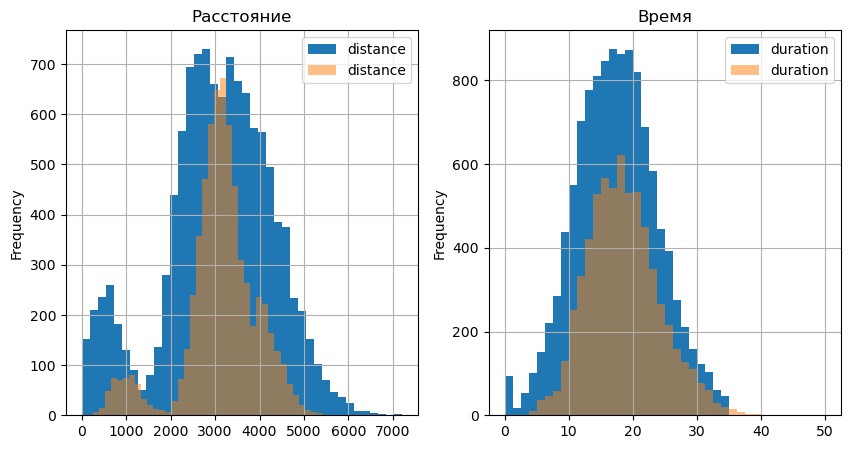

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
free_data_users_full.plot(kind='hist', y='distance', bins=40, grid=True, title='Расстояние', ax=axes[0])
free_data_users_full.plot(kind='hist', y='duration', bins=40, range=(0,50), grid=True, title='Время', ax=axes[1])

ultra_data_users_full.plot(kind='hist', y='distance', bins=40, grid=True, alpha=0.5, title='Расстояние', ax=axes[0])
ultra_data_users_full.plot(kind='hist', y='duration', bins=40, range=(0,50), grid=True, alpha=0.5, title='Время', ax=axes[1])

plt.show()

<br> Мы видим для бесплатного тарифа пользователи проезжают от 2 до 4.6 км, а время от 10 до 25 мин. 
<br> Мы видим для платного тарифа пользователи проезжают от 2.5 до 3.5 км с пиком около 3 км, а время от 14 до 23 мин. 

Для бесплатного тарифа мы видим также что преобладает кол-во пользователей которые проехали больше 5 км, что не скажешь о платном и по графикам пользователи с бесплатным тарифом дольше ездят 

## Подсчёт выручки

**Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными (табл : data_users_rides_sub)**

Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц согласно ТЗ

In [42]:
data_users_rides_sub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [43]:
calc_billing = pd.pivot_table(data_users_rides_sub, 
                              index=['user_id', 'name', 'month'], 
                              values=['duration', 'distance', 'subscription_type'],
                              aggfunc = {"duration": ['count', 'sum'], "distance": ['sum'], "subscription_type" : ['first']}
                             )

calc_billing.columns = ['distance_total', 'count_trips', 'duration_total', 'subscription_type']
calc_billing['distance_total'] = np.ceil(calc_billing['distance_total'])
calc_billing['duration_total'] = np.ceil(calc_billing['duration_total'])

calc_billing
#calc_billing.query('user_id == 2')

distance_total  count_trips  duration_total  \
user_id name    month                                                
1       Кира    1              7028.0            2            42.0   
                4               755.0            1             7.0   
                8              6724.0            2            45.0   
                10             5810.0            2            32.0   
                11             7004.0            3            54.0   
...                               ...          ...             ...   
1534    Альберт 6              3410.0            2            25.0   
                8              7623.0            2            48.0   
                9              4929.0            1            23.0   
                11            13351.0            4            77.0   
                12             2372.0            1            16.0   

                      subscription_type  
user_id name    month                    
1       Кира    1                 ultra  
                4                 ultra  
                8                 ultra  
                10                ultra  
                11                ultra  
...                                 ...  
1534    Альберт 6                  free  
                8                  free  
                9                  free  
                11                 free  
                12                 free  

[11331 rows x 4 columns]

**Добавление столбца с помесячной выручкой в полученный датафрейм**

Условия подписок согласно ТЗ

    без подписки
      
        абонентская плата отсутствует;
        стоимость одной минуты поездки — 8 рублей;
        стоимость старта (начала поездки) — 50 рублей;
    с подпиской Ultra
      
        абонентская плата — 199 рублей в месяц;
        стоимость одной минуты поездки — 6 рублей;
        стоимость старта — бесплатно.


In [44]:
def bill_all(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration_total'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration_total'] + 50 * row['count_trips']


calc_billing['billing_per_month'] = calc_billing.apply(bill_all, axis=1)
calc_billing

distance_total  count_trips  duration_total  \
user_id name    month                                                
1       Кира    1              7028.0            2            42.0   
                4               755.0            1             7.0   
                8              6724.0            2            45.0   
                10             5810.0            2            32.0   
                11             7004.0            3            54.0   
...                               ...          ...             ...   
1534    Альберт 6              3410.0            2            25.0   
                8              7623.0            2            48.0   
                9              4929.0            1            23.0   
                11            13351.0            4            77.0   
                12             2372.0            1            16.0   

                      subscription_type  billing_per_month  
user_id name    month                                       
1       Кира    1                 ultra              451.0  
                4                 ultra              241.0  
                8                 ultra              469.0  
                10                ultra              391.0  
                11                ultra              523.0  
...                                 ...                ...  
1534    Альберт 6                  free              300.0  
                8                  free              484.0  
                9                  free              234.0  
                11                 free              816.0  
                12                 free              178.0  

[11331 rows x 5 columns]

В итоге у нас получилась таблица calc_billing с агрегированными значениями и с подсчетом выручки за каждый месяц для конкретного пользователя в зависимости от тарифа

## Проверка гипотез

**1. Проверка гипотезы о пользователях с подпиской**

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Сформируем нулевую и альтернативную гипотезу

<br> H0 : ultra duration = free duration
<br> H1 : ultra duration > free duration

In [45]:
def mean_hypothesis(ho, h1, alpha, sample_1, sample_2, equal_var=True, alternative='two-sided'):
    """
    Функция проверяет гипотезу о равенстве средних, используя t-критерий Стьюдента.
    
    Parameters
    ----------
    ho: string
        Нулевая гипотеза.
    h1: string
        Альтернативная гипотеза.
    alpha: float
        Уровень значимости.        
    sample_1: Pandas Dataframe
        Набор данных 1.
    sample_2: Pandas Dataframe
        Набор данных 1.
    equal_var: string
        True - значение по умолчанию. Параметр метода ttest_ind.
    
    Returns
    -------
    Функция возвращает None.
    """
    
    print(f'H0 (нулевая гипотеза): {ho}')
    print(f'H1 (альтернативная гипотеза): {h1}')
    print(f'Уровень значимости: {alpha}')
    print('')
    
    print('Sample_1')
    print(f'Среднее значение: {sample_1.mean():.2f}, дисперсия: {sample_1.var():.2f}, стандартное отклонение: {sample_1.std():.2f}')
    print('')
    
    print('Sample_2')
    print(f'Среднее значение: {sample_2.mean():.2f}, дисперсия: {sample_2.var():.2f}, стандартное отклонение: {sample_2.std():.2f}')
    print('')
    
    # применяем t-критерий Стьюдента из стандартного пакета
    results = st.ttest_ind(sample_1, sample_2, equal_var=equal_var, alternative=alternative)
    print(f'p-значение округленное = : {results.pvalue:.2f}, p-значение полученное = : {results.pvalue}')
    print('')
    
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

In [46]:
#ultra_data_users_full
#free_data_users_full

serias_ultra = ultra_data_users_full['duration']
serias_free = free_data_users_full['duration']

mean_hypothesis('ultra duration = free duration', 'ultra duration > free duration', .05, serias_ultra, serias_free, 'greater')

H0 (нулевая гипотеза): ultra duration = free duration
H1 (альтернативная гипотеза): ultra duration > free duration
Уровень значимости: 0.05

Sample_1
Среднее значение: 18.54, дисперсия: 31.05, стандартное отклонение: 5.57

Sample_2
Среднее значение: 17.39, дисперсия: 40.03, стандартное отклонение: 6.33

p-значение округленное = : 0.00, p-значение полученное = : 2.5608196633291235e-34

Отвергаем нулевую гипотезу


Таким образом гипотеза о том что пользователи с подпиской тратят больше времени на поездки верна.

**2. Проверка гипотезы о расстоянии в 3130 метров**

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

In [47]:
def sample_hypothesis(ho, h1, alpha, sample, popmean, alternative='greater'):
    """
    Функция для проверки двусторонней гипотезы о равенстве среднего генеральной совокупности некоторому значению
    
    Parameters
    ----------
    ho: string
        Нулевая гипотеза.
    h1: string
        Альтернативная гипотеза.
    alpha: float
        Уровень значимости.        
    sample: Pandas Dataframe
        Набор данных.
    popmean: float
        среднее значение генеральной совокупности
    alternative: string
        nтип проверки гипотезы
    
    Returns
    -------
    Функция возвращает None.
    """
    
    print(f'H0 (нулевая гипотеза): {ho}')
    print(f'H1 (альтернативная гипотеза): {h1}')
    print(f'равенство которому вы делаете тест на проверку двусторонней гипотезы: {popmean}')
    print(f'Уровень значимости: {alpha}')
    print('')
    
    print('Sample')
    print(f'Среднее значение: {sample.mean():.2f}, дисперсия: {sample.var():.2f}, стандартное отклонение: {sample.std():.2f}')
    print('')
    
    
    # применяем t-критерий из стандартного пакета для проверки двусторонней гипотезы о равенстве среднего генеральной совокупности некоторому значению
    results = st.ttest_1samp(sample, popmean, alternative=alternative)
    print(f'p-значение округленное = : {results.pvalue:.2f} p-значение полученное = : {results.pvalue}')
    print('')
    
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

In [48]:
serias_ultra = ultra_data_users_full['distance']

sample_hypothesis('ultra duration = 3130', 'ultra duration < 3130', .05, serias_ultra, 3130, 'less')

H0 (нулевая гипотеза): ultra duration = 3130
H1 (альтернативная гипотеза): ultra duration < 3130
равенство которому вы делаете тест на проверку двусторонней гипотезы: 3130
Уровень значимости: 0.05

Sample
Среднее значение: 3115.45, дисперсия: 700393.79, стандартное отклонение: 836.90

p-значение округленное = : 0.08 p-значение полученное = : 0.08046311521502146

Не получилось отвергнуть нулевую гипотезу


В данном случае мы применяли одностороннюю левую проверку гипотезы («среднее генеральной совокупности меньше, чем A»).
Таким образом мы не можем утверждать что расстояние не прывашает  3130 метров

**3. Проверка гипотезу о выручке от пользователей**

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

In [49]:
#calc_billing

serias_ultra = calc_billing.loc[calc_billing['subscription_type'] == 'ultra', 'billing_per_month']
serias_free = calc_billing.loc[calc_billing['subscription_type'] == 'free', 'billing_per_month']

#print(serias_ultra)

mean_hypothesis('ultra billing_per_month = free billing_per_month', 'ultra billing_per_month > free billing_per_month', .05, serias_ultra, serias_free, 'greater')

H0 (нулевая гипотеза): ultra billing_per_month = free billing_per_month
H1 (альтернативная гипотеза): ultra billing_per_month > free billing_per_month
Уровень значимости: 0.05

Sample_1
Среднее значение: 361.48, дисперсия: 7464.95, стандартное отклонение: 86.40

Sample_2
Среднее значение: 325.84, дисперсия: 32585.90, стандартное отклонение: 180.52

p-значение округленное = : 0.00, p-значение полученное = : 5.626185237697457e-35

Отвергаем нулевую гипотезу


Таким образом выручка пользователей с подпиской больше чем без подписки

**4. ответ на вопрос об изменении выборки с сервисом**

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ:**

У нас есть две выборки (до/после применения обновления).

Т.е. если генеральная совокупность была изменена и мы просто сравниваем средние совокупности до и после этого изменения то логично применить гипотезу о равенстве средних для зависимых (парных) выборок

Давайте сформулируем гипотезу_0 и гипотезу_1(альтернативную)
<br> H0: m1 = m2
<br> H1: m1 != m2
<br> m1, m2 - средние значения до и после изменения.


`results = st.ttest_rel(before, after)`

**5. Распределения №1**


Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

In [50]:
#calc_billing
#data_users_rides_sub

Решение:

Рассматриваем случай, вероятность:
</br> пользователь продлевает = 0.1
</br> пользователь не продлевает = 0.9
</br> На первый взгляд - это биномиальный эксперимент
</br> Кол-во попыток должно быть не менее 1000 чтобы как минимум 100 человек продлили подписку. 

In [51]:
from scipy import stats as st
import seaborn as sns
import math

n = 1000 # задаём параметры биномиального распределения
p = 0.1 # вероятность успеха

result = 0

while result < 100:
    mu = n * p # мат ожидание
    sigma = math.sqrt(n * p * (1 - p)) # дисперсия
    distr = st.norm(mu, sigma)

    result = distr.ppf(0.05)
    result1 = distr.cdf(100)
    n += 1
    
print(n, result, result1)

1170 100.02841955223582 0.04971489312694162


Минимальное кол-во промокодов равно 1170 чтобы вероятность не выполнить план была примерно 5 %.

**6. Распределения №2**

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,53 тыс. пользователей.

In [52]:
from scipy import stats as st
import seaborn as sns
import math

n = 1000000 # задаём параметры биномиального распределения
p = 0.4 # вероятность успеха

mu = n * p
sigma = math.sqrt(n * p * (1 - p))
distr = st.norm(mu, sigma)

result = distr.cdf(399053)
print(result)

0.026614671022916994


Ответ: 2.6 % на 399,53 тыс. уведомлений откроют

## Вывод

Мы получили и проанализировали информацию о сервисе Яндекс Го самокат. Загрузили три таблицы:
- users_go
- rides_go
- subscriptions_go

Выполнили предобработку данных по трем датафреймам: какие пропущенные значения обнаружены, изменены типы данных, просмотр неявных дубликатов, добавили колонку месяц.

Выполнили анализ данных и построили графики:
- частота встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок;

Больше всего ездят в Пятигорске, но вцелом разница между Москвой и Питером небольшая. В средней распределение равномерное между всеми городами
Больше преобладают пользователи без подписки.
в основном пользуются люди в возрасте = 22 - 28 лет.
В основном люди проезжают 2.2-4 км.
Чаще всего длительность поездки состовляет 13 - 24 минуты.

Провели анализ поездок пользователей с платной подпиской и бусплатной:
Для бесплатного тарифа мы видим  преобладает кол-во пользователей которые проехали больше 5 км, что не скажешь о платном и по графикам пользователи с бесплатным тарифом дольше ездят. 

Также мы добавили агрегацию для каждого пользователя за каждый месяц : расстояние, количество поездок и суммарное время.

Проверили гипотезы:
<br>тратят ли пользователи с подпиской больше времени на поездки
- Подтвердили альтернативную гипотезу - да

<br>расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- мы не можем утверждать что расстояние не прывашает 3130 метров

<br>помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
- выручка пользователей с подпиской больше чем без подписки



_Рекомендации:_

Проверить, почему Москва или С-Питербург не находятся в топе. Для платного тарифа проработать над увеличением продолжительности поездки у пользователей. Для людей которые очень активно пользуются сервисом - добавить скидки (или один бесплатный километр). Провести акции для увеличения пользователей с подпиской, т.к они приносят больше прибыли 


**Чек-лист готовности проекта**

- [x]  Загрузка данных: открыть файлы, изучить их, сохранить в DF, собрать общую информацию (info/ гистограммы и тд)

- [x]  Предобработка данных: определены пропущенные значения, заполнены пропущенные значения там, где это возможно, есть пояснение, какие пропущенные значения обнаружены, изменены типы данных, просмотр неявных дубликатов, поиск аномалий/ устранение аномалий
- [x]  Предобработка данных: добавление месяца
- [x]  Исследовательский анализ данных, изучены и построены гистограммы:
        - частота встречаемости городов;
        - соотношение пользователей с подпиской и без подписки;
        - возраст пользователей;
        - расстояние, которое пользователь преодолел за одну поездку;
        - продолжительность поездок;
- [x]  Выполнено объединение данных о пользователях, поездках
- [x]  Создано ещё два датафрейма c данными о пользователях без подписки и с подпиской
- [x]  Был произведен подсчёт выручки с агрегированными данными о поездках
        - Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными
        - добавлен столбец с помесячной выручкой
        - округлены значения в этом столбце в большую сторону
- [x]  Проверка гипотезы: тратят ли пользователи с подпиской больше времени на поездки? 
- [x]  Проверка гипотезы о расстоянии в  3130 метров
- [x]  Проверка гипотезы о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше , чем выручка от пользователей без подписки
- [x]  ответ на вопрос об изменении выборки с сервисом



- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод